Introducing convolutional neural networks (ML Zero to Hero - Part 3)

https://www.youtube.com/watch?v=x_VrgWTKkiM&list=PLQY2H8rRoyvwWuPiWnuTDBHe7I0fMSsfO&index=3

In [1]:
import tensorflow as tf
print(tf.__version__)

2023-01-10 15:55:47.168692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0


In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
training_images.shape, training_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
training_images = training_images.reshape(60000, 28, 28, 1)

In [5]:
training_images.shape

(60000, 28, 28, 1)

In [7]:
training_images[0].shape

(28, 28, 1)

In [8]:
training_images = training_images / 255.0

In [9]:
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [13]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 43s 22ms/step - loss: 0.4418 - accuracy: 0.8384
Epoch 2/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2989 - accuracy: 0.8911
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2543 - accuracy: 0.9059
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2224 - accuracy: 0.9171
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1920 - accuracy: 0.9285


In [14]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
f'Test loss: {test_loss}, Test accuracy: {test_accuracy * 100}'

313/313 [==============================] - 2s 6ms/step - loss: 0.2431 - accuracy: 0.9122


'Test loss: 0.24308881163597107, Test accuracy: 91.21999740600586'

In [15]:
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy * 100}')

Test loss: 0.24308881163597107, Test accuracy: 91.21999740600586


In [23]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(training_images, training_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.4331 - accuracy: 0.8425
Epoch 2/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2897 - accuracy: 0.8927
Epoch 3/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2444 - accuracy: 0.9102
Epoch 4/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2134 - accuracy: 0.9201
Epoch 5/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1878 - accuracy: 0.9301
Epoch 6/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1626 - accuracy: 0.9387
Epoch 7/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1447 - accuracy: 0.9454
Epoch 8/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1260 - accuracy: 0.9518
Epoch 9/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1106 - accuracy: 0.9583
Epoch 10/20
1875/1875 [==============================] - 41s 22m

In [26]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
f'Test loss: {test_loss}, Test accuracy: {test_accuracy * 100}'

313/313 [==============================] - 2s 5ms/step - loss: 0.5064 - accuracy: 0.9090


'Test loss: 0.5064190626144409, Test accuracy: 90.89999794960022'

In [28]:
import matplotlib.pyplot as plt

In [30]:
from tensorflow.keras import models

1/1 [==============================] - 0s 30ms/step


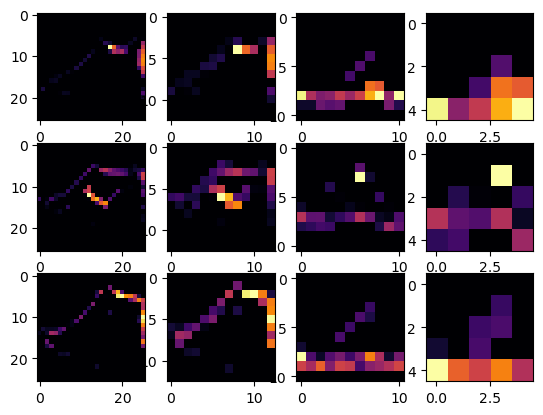

In [34]:
fig, ax = plt.subplots(3,4)

FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 6

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    ax[0, x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    ax[0, x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    ax[1, x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    ax[1, x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    ax[2, x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    ax[2, x].grid(False)

In [35]:
model.layers

In [36]:
layer_outputs

[<KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 13, 13, 64) dtype=float32 (created by layer 'max_pooling2d_4')>,
 <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_5')>,
 <KerasTensor: shape=(None, 5, 5, 64) dtype=float32 (created by layer 'max_pooling2d_5')>,
 <KerasTensor: shape=(None, 1600) dtype=float32 (created by layer 'flatten_2')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_4')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_5')>]

In [37]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_4_input')>

In [41]:
type(activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1)))

1/1 [==============================] - 0s 32ms/step


list

In [40]:
len(activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1)))

1/1 [==============================] - 0s 30ms/step


7